<a href="https://colab.research.google.com/github/ParthG60/AXA_IM_market_data/blob/main/AXA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_incomplete = pd.read_csv("ftseall_index.csv")   #the csv file is in the session storage

df_incomplete.head()
df_incomplete.describe()  #initial check on the data
#df_incomplete.nunique()
#df_incomplete.info()

,weight,px_bid,px_ask,volume_avg_20d,px_close_ytd
count,602.000000,602.000000,602.000000,6.020000e+02,602.000000
mean,0.166099,904.667002,908.244103,1.879955e+06,1007.532661
std,0.577032,2426.543709,2433.063543,8.836553e+06,2561.205671
min,0.000712,8.040000,9.600000,1.302250e+03,10.342000
25%,0.012813,146.762500,148.550000,1.586325e+05,162.562500
50%,0.030531,316.500000,320.300000,4.347895e+05,353.500000
75%,0.088374,854.375000,855.375000,1.154317e+06,923.750000
max,6.843737,49800.000000,49950.000000,1.804387e+08,50200.000000


In [ ]:
df  = df_incomplete.loc[df_incomplete['gics_sector_name']!= 'Investment Fund'] # removing 'Investment fund' data

df = df.assign(px_mid = (df['px_bid']+df['px_ask'])/2)   #mid price
df = df.assign(ytd_rtn = ((df['px_mid']-df['px_close_ytd'])/df['px_close_ytd'])*100) #calculating ytd returns in terms of percentages
df = df.assign(volume_20d_mv = ((df['volume_avg_20d']*df['px_mid'])/1000000))  # calculating volume expressed in market value (millions)
df = df.assign(bid_ask_spread = ((df['px_ask']-df['px_bid'])/df['px_mid'])*100)  #calculating the spread in % value

df.describe()


,weight,px_bid,px_ask,volume_avg_20d,px_close_ytd,px_mid,ytd_rtn,volume_20d_mv,bid_ask_spread
count,426.000000,426.000000,426.000000,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.220763,931.997523,934.585329,2.450955e+06,1049.830040,933.291426,-6.921789,1052.619796,0.534308
std,0.677927,1549.568366,1551.550715,1.044635e+07,1797.313121,1550.547920,19.551913,2649.256517,1.039587
min,0.001570,10.000000,10.620000,1.302250e+03,14.140000,10.310000,-59.071472,1.372618,0.010210
25%,0.014282,147.387500,148.750000,2.192438e+05,160.125000,148.137500,-19.701272,66.601975,0.062035
50%,0.039559,329.400000,331.000000,5.991138e+05,368.750000,329.825000,-7.462282,201.787809,0.134613
75%,0.130818,1029.325000,1029.750000,1.365776e+06,1160.250000,1029.537500,3.484289,899.243838,0.479425
max,6.843737,12720.000000,12725.000000,1.804387e+08,16050.000000,12722.500000,94.310897,27136.010150,7.407407


In [ ]:
df_loss = df.sort_values('ytd_rtn').head(10) # filtering to find worst 10 sectors
df_win = df.sort_values('ytd_rtn',ascending= False).head(10) # filtering to find best 10 sectors

for col in df_loss.columns:   # deleting unwanted columns so I can print a neat table
   if (col != 'name' and col != 'ticker' and col != 'ytd_rtn' and col != 'gics_sector_name'):
        del df_loss[col] 
df_loss
# df_loss

,ticker,name,gics_sector_name,ytd_rtn
397,TRST LN Equity,Investment Fundpilot Group PLC,Communication Services,-59.071472
592,MADE LN Equity,Made.com Group PLC,Consumer Discretionary,-55.750000
404,OXB LN Equity,Oxford Biomedica PLC,Health Care,-54.146341
591,MORE LN Equity,Hostmore Plc,Consumer Discretionary,-46.837607
174,GNS LN Equity,Genus PLC,Health Care,-46.537060
357,MOON LN Equity,Moonpig Group PLC,Consumer Discretionary,-46.266667
529,APTD LN Equity,Aptitude Software Group PLC,Information Technology,-44.741379
563,LUCE LN Equity,Luceco PLC,Industrials,-44.619799
216,CSP LN Equity,Countryside Partnerships PLC,Consumer Discretionary,-43.666667
314,LIO LN Equity,LionInvestment Fund Asset Management PLC,Financials,-43.272727


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


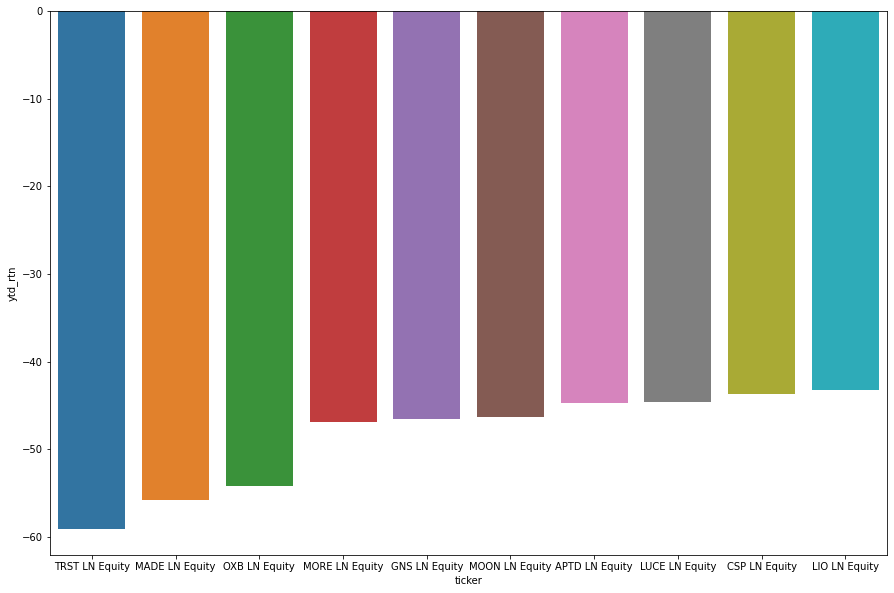

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(df_loss['ticker'],df_loss['ytd_rtn'])   # presenting data using a barplot
# sns.barplot(df_win['ticker'],df_win['ytd_rtn'])

In [ ]:
pd.set_option('display.max_columns',1000) 
pd.set_option('display.max_rows',1000)# so that more columns and rows are rendered 

df_sector = df.groupby(pd.Grouper(key='gics_sector_name'))  #grouping data by sector

df_sector.describe()  #summary statisitcs by sector to find strongest index


weight                                          \
                        count      mean       std       min       25%   
gics_sector_name                                                        
Energy                   14.0  0.737173  1.938060  0.003089  0.018005   
Health Care              13.0  0.864628  1.951215  0.006552  0.026412   
Financials               78.0  0.202473  0.555570  0.002899  0.012803   
Consumer Staples         25.0  0.598140  1.153631  0.002710  0.018156   
Materials                28.0  0.361623  0.714543  0.006423  0.027246   
Industrials              82.0  0.143927  0.284822  0.003672  0.013089   
Utilities                11.0  0.357473  0.505254  0.013473  0.121861   
Communication Services   22.0  0.183783  0.313947  0.005522  0.017691   
Consumer Discretionary   75.0  0.092687  0.173414  0.002335  0.012397   
Real Estate              52.0  0.060074  0.101209  0.001570  0.013154   
Information Technology   26.0  0.067685  0.090894  0.004305  0.014868   

                                                     px_bid               \
                             50%       75%       max  count         mean   
gics_sector_name                                                           
Energy                  0.029487  0.056058  6.843737   14.0   394.539286   
Health Care             0.079277  0.160234  6.532303   13.0  1850.992308   
Financials              0.039236  0.133509  4.384976   78.0   665.003013   
Consumer Staples        0.092138  0.232992  3.703356   25.0  1306.294000   
Materials               0.051053  0.234124  2.553143   28.0  1505.672143   
Industrials             0.035387  0.137410  1.823629   82.0  1224.078049   
Utilities               0.147205  0.312787  1.737943   11.0  1002.521818   
Communication Services  0.050611  0.234684  1.410388   22.0   567.055909   
Consumer Discretionary  0.025758  0.098016  1.250987   75.0   952.850000   
Real Estate             0.022860  0.074735  0.672444   52.0   371.038654   
Information Technology  0.040929  0.071155  0.388605   26.0  1004.729231   

                                                                            \
                                std      min      25%       50%        75%   
gics_sector_name                                                             
Energy                   608.245669   26.800   69.575   163.475   376.4125   
Health Care             2834.182510  160.000  233.500   560.000  2049.0000   
Financials              1043.133416   46.925  167.250   310.800   762.6250   
Consumer Staples        1589.539009   33.600  203.000   771.200  1656.0000   
Materials               1831.625668   90.520  285.225   712.900  1941.1250   
Industrials             2101.357026   10.000  177.150   420.500  1063.1500   
Utilities                897.662267   80.340  173.150  1052.000  1336.0000   
Communication Services   748.429889   32.140  136.850   259.175   634.2000   
Consumer Discretionary  1645.287313   24.100  147.525   266.400   913.2500   
Real Estate              547.692648   31.960   95.900   137.850   366.5000   
Information Technology  1120.105577   21.460  227.550   457.700  1455.7500   

                                px_ask                                    \
                            max  count         mean          std     min   
gics_sector_name                                                           
Energy                   2221.5   14.0   395.364286   608.835617   26.90   
Health Care             10498.0   13.0  1853.376923  2835.361840  165.00   
Financials               8010.0   78.0   667.934103  1045.766699   46.93   
Consumer Staples         6164.0   25.0  1307.846000  1590.099720   34.50   
Materials                7676.0   28.0  1506.938929  1831.983962   90.54   
Industrials             12720.0   82.0  1229.543415  2105.687430   10.62   
Utilities                3021.0   11.0  1003.660000   898.482748   80.36   
Communication Services   2910.0   22.0   568.452273   749.446918   32.17   
Consum

In [ ]:
df['mcap_mm']=df['mcap_mm'].str.replace(',','').astype(int) # mmcap_mm is an object datatype, need to remove commas for comparision

df_smallcap = df.loc[df['mcap_mm']<500] #checking for market cap less then 500 mil

df_smallcap.describe()

,mcap_mm,weight,px_bid,px_ask,volume_avg_20d,px_close_ytd,px_mid,ytd_rtn,volume_20d_mv,bid_ask_spread
count,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,140.000000,140.000000
mean,248.078571,0.010193,290.138214,295.343786,4.813033e+05,318.633079,292.741000,-6.374257,58.195785,1.343566
std,120.948296,0.004973,408.210292,424.763019,9.475956e+05,436.260957,416.439734,22.522545,69.446257,1.504182
min,39.000000,0.001570,10.000000,10.620000,1.302250e+03,14.140000,10.310000,-59.071472,1.372618,0.075786
25%,146.000000,0.006019,90.075000,90.850000,9.971229e+04,95.650000,90.462500,-18.537831,18.193509,0.356133
50%,230.000000,0.009527,158.750000,163.750000,2.073796e+05,181.000000,161.250000,-5.567956,42.017321,0.800115
75%,340.750000,0.013931,326.250000,333.000000,5.179491e+05,352.500000,329.625000,4.106464,72.764318,1.589678
max,488.000000,0.020063,3270.000000,3500.000000,9.180112e+06,3230.000000,3385.000000,92.903226,663.248976,7.407407


In [ ]:
df_smallcap['mcap_mm'].mean() # calculating mean market cap 
# df['mcap_mm'].mean()

248.07857142857142

In [ ]:
df.describe()

x = {'bid-ask spread (%)': [df['bid_ask_spread'].mean(), df_smallcap['bid_ask_spread'].mean()], 
     'avg daily volume(number of shares)': [df['volume_avg_20d'].mean()/1000000, df_smallcap['volume_avg_20d'].mean()/1000000], 
     'avg daily volume (market value)': [df['volume_20d_mv'].mean(), df_smallcap['volume_20d_mv'].mean()] }
index1 = ['Index', 'Small Cap']

table = pd.DataFrame(data=x, index=index1)
table


,bid-ask spread (%),avg daily volume(number of shares),avg daily volume (market value)
Index,0.534308,2.450955,1052.619796
Small Cap,1.343566,0.481303,58.195785


In [ ]:
# looking for other possible insights

plt.figure(figsize=(30,20))

# sns.heatmap(df.corr())

# df_sector.corr() 
# df_smallcap.corr()
df.corr()

,mcap_mm,weight,px_bid,px_ask,volume_avg_20d,px_close_ytd,px_mid,ytd_rtn,volume_20d_mv,bid_ask_spread
mcap_mm,1.000000,0.999998,0.382688,0.381961,0.256462,0.292020,0.382327,0.205828,0.954480,-0.147149
weight,0.999998,1.000000,0.383140,0.382413,0.256162,0.292425,0.382779,0.205690,0.954321,-0.147182
px_bid,0.382688,0.383140,1.000000,0.999970,-0.076289,0.979715,0.999992,-0.031650,0.373977,-0.151012
px_ask,0.381961,0.382413,0.999970,1.000000,-0.076540,0.979596,0.999993,-0.031514,0.373160,-0.147326
volume_avg_20d,0.256462,0.256162,-0.076289,-0.076540,1.000000,-0.081183,-0.076415,0.082343,0.379534,-0.097053
px_close_ytd,0.292020,0.292425,0.979715,0.979596,-0.081183,1.000000,0.979663,-0.125139,0.290548,-0.148724
px_mid,0.382327,0.382779,0.999992,0.999993,-0.076415,0.979663,1.000000,-0.031582,0.373571,-0.149169
ytd_rtn,0.205828,0.205690,-0.031650,-0.031514,0.082343,-0.125139,-0.031582,1.000000,0.222768,-0.058343
volume_20d_mv,0.954480,0.954321,0.373977,0.373160,0.379534,0.290548,0.373571,0.222768,1.000000,-0.179323
bid_ask_spread,-0.147149,-0.147182,-0.151012,-0.147326,-0.097053,-0.148724,-0.149169,-0.058343,-0.179323,1.000000


<Figure size 2160x1440 with 0 Axes>

Text(0.5, 1.0, 'Index(Blue) , Small Cap(Orange)')

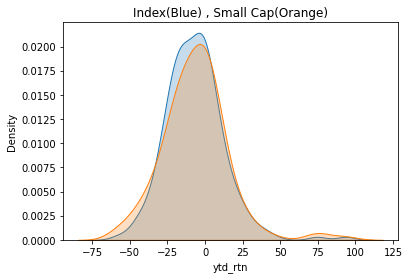

In [ ]:
sns.kdeplot(df['ytd_rtn'], shade=True, label = 'Index')
sns.kdeplot(df_smallcap['ytd_rtn'], shade=True, label = 'Small Cap')
plt.title("Index(Blue) , Small Cap(Orange)")

#roughly normally distributed returns 